## ML (H) Week 10 Lab - Support Vector Machines (SVM)

### Aims:
- Generate your own data to test classification
- Practice Support Vector Machine - tuning soft margin (C) and kernel parameters ($\beta$)
    

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline
import pylab as plt
from matplotlib.colors import ListedColormap


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

### Generate your own data to test binary classifiers

Generate two dimensional Gaussian distributed data for two different classes

 * Generate multivariate Guassian random samples: 
         https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html
         
 * Plot is based on $$\mbox{class 0}: \mu_0 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \Sigma_0=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$, $$\mbox{class 1}: \mu_1 = \begin{bmatrix} 7 \\ 7 \end{bmatrix}, \Sigma_1=\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$$ 

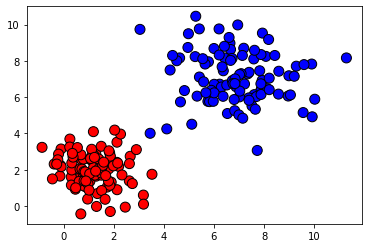

In [2]:
np.random.seed(seed=1)

# Data of class 0
mean_class1 = (1, 2)
cov_class1  = [[1, 0], [0, 1]]
x_class1    = np.random.multivariate_normal(mean_class1, cov_class1, size=100)
t_class1 = np.zeros_like(x_class1)[:,0]

# Data of class 1
mean_class2 = (7, 7)
cov_class2  = [[2, 0], [0, 2]]
x_class2   = np.random.multivariate_normal(mean_class2, cov_class2, size=100)
t_class2 = np.ones_like(x_class2)[:,0]

# Combine data and labels into X and t
X = np.vstack((x_class1, x_class2))
t = np.hstack((t_class1, t_class2))

plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)

### 1. Use SVM on generated data, with different margins and kernerls.

Reference to SVM in sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [3]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#### 1.1 Test hard margin SVM without kernel projection

Recall from the lecture notes that the SVM objective is:

$$ \text{min}\,\mathbf{w}^T\mathbf{w}\,\, \text{s.t.}\,t_n(\mathbf{w}^T\mathbf{x}_n + b) \geq 1$$

Applying the Lagrange duality coefficients, we were eventually able to simplify this to:

$$ \text{max}\, \sum_i \alpha_i - \frac{1}{2}\sum_{i,j} \alpha_i\alpha_j t_i t_j (\mathbf{x}_i\cdot \mathbf{x}_j)\,\, \textsf{subject to}~~\sum_{i} \alpha_i t_i=0,~~ 0 \leq \alpha_i\leq C$$


The parameter $C$ controls the **softness** or **relexation of the margin constraints**. The SVC function in sklearn implements an SVM with soft margin. It has the parameter `C` (same as we had studied in the class) controling how soft the margin is (remember that after you simplify the primal and subs). Based on your understanding of soft margin SVM, choose a value for `C` that is equivalent to a hard margin SVM.

**TASK**: Complete the following code to train an SVM classifier with linear kernel.

Recall from the class, we saw that if you set the value of C too high, it basically reduces to learning the margin without any slack.
So, first we see how the margin is affected by a few outliers. See how the margin is close to one of those outlier blue points!

In [5]:
from sklearn.svm import SVC

### TASK: Write code to train an SVM model
#...

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Classification - Hard Margin (No slack!)")

NameError: name 'Z' is not defined

#### 1.2 Test soft margin SVM without kernel projection

We now decrease C so as to allow some error (slack) in the constraints -- all with the purpose of better generalising the model.

**TASK**: Complete the code

In [6]:
from sklearn.svm import SVC

#TASK: INSERT CODE HERE
#...

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Classification")

NameError: name 'Z' is not defined

#### 1.3 Test non-linear data.

Recall the importance of kernel functions. Here we see the Gaussian kernel in action!

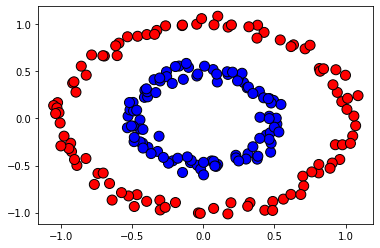

In [6]:
from sklearn import cluster, datasets

n_samples = 200
np.random.seed(seed=1)
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

X = noisy_circles[0]
t = noisy_circles[1]
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)


In [7]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#### 1.4 Train SVM classifier with the RBF kernel:

What we represented as $\beta$ in the class, is denoted as $\gamma$ in the sklearn library. This is the coefficient in the Gaussian kernel.

$$k(\mathbf{x}_n,\mathbf{x}_m) = \exp\left\{-\beta(\mathbf{x}_n-\mathbf{x}_m)^T(\mathbf{x}_n-\mathbf{x}_m)\right\}$$

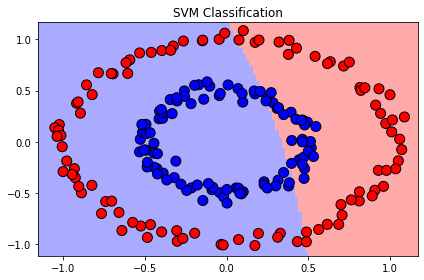

In [8]:
from sklearn.svm import SVC

#TASK: INSERT CODE HERE
#...

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Classification")
plt.tight_layout()

#### Task 1.5: Explore a grid of  `C` and `gamma` values

**TASK**: Change $\gamma \in \{1e-3, 1, 1e+3\}$ and margin values $C \in \{1e-3, 1, 1e+2\}$ and note the effect on the decision boundary.

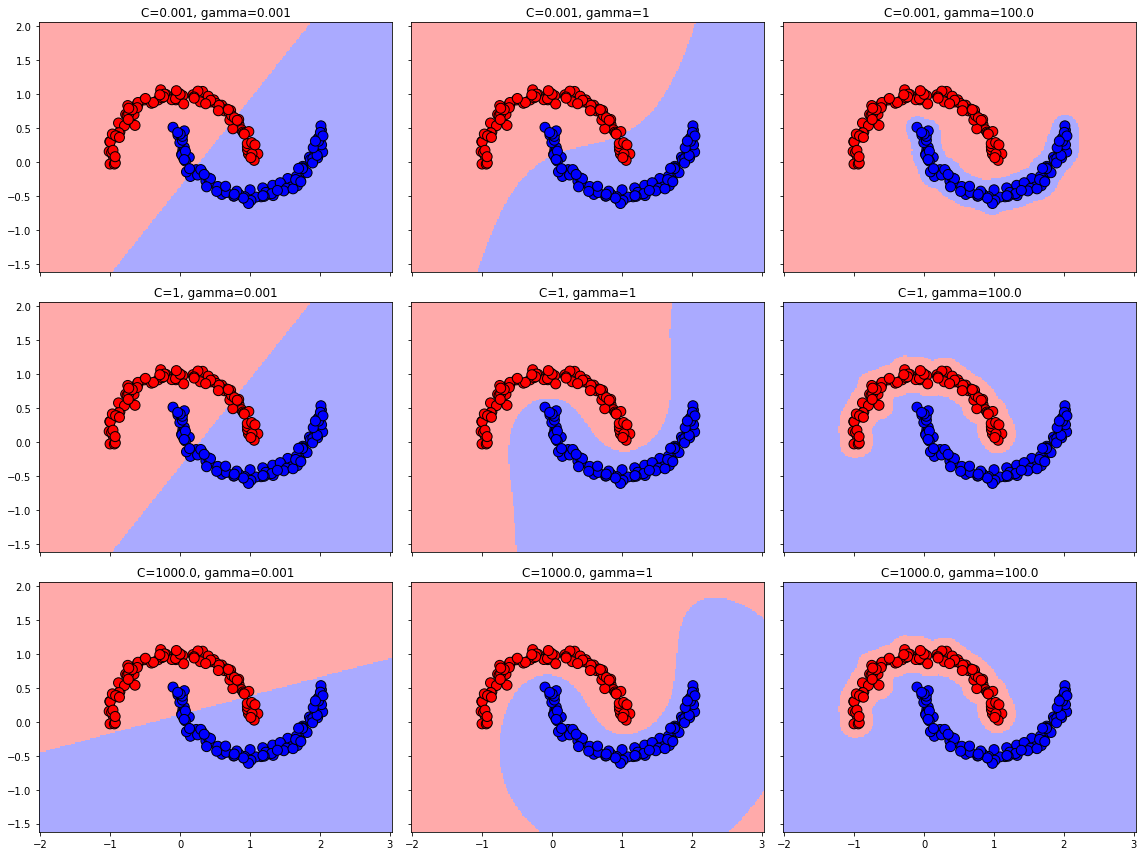

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# hyperparameters to explore
C_values = [1e-3, 1, 1e+3]
gamma_values = [1e-3, 1, 1e+2]

#TASK: INSERT CODE HERE
#...


### 2. Test SVM on 'Moon data'

We are now going to try out polynomial kernels for the "moon data".

**TASK**: Similar to the previous exercise, you now have to see how the degree ($d$) of the polynomial and the slack bound (C) both affect the performance.
Write code to explore the following grid: $C \in \{0.001, 0.1, 1, 100\}$, and $d \in \{1, 2, 3, 5\}$.

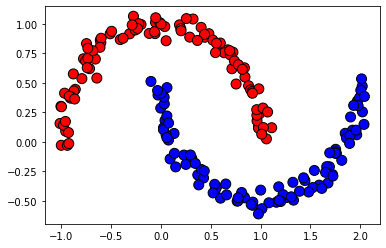

In [10]:
np.random.seed(seed=1)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X = noisy_moons[0]
t = noisy_moons[1]
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)

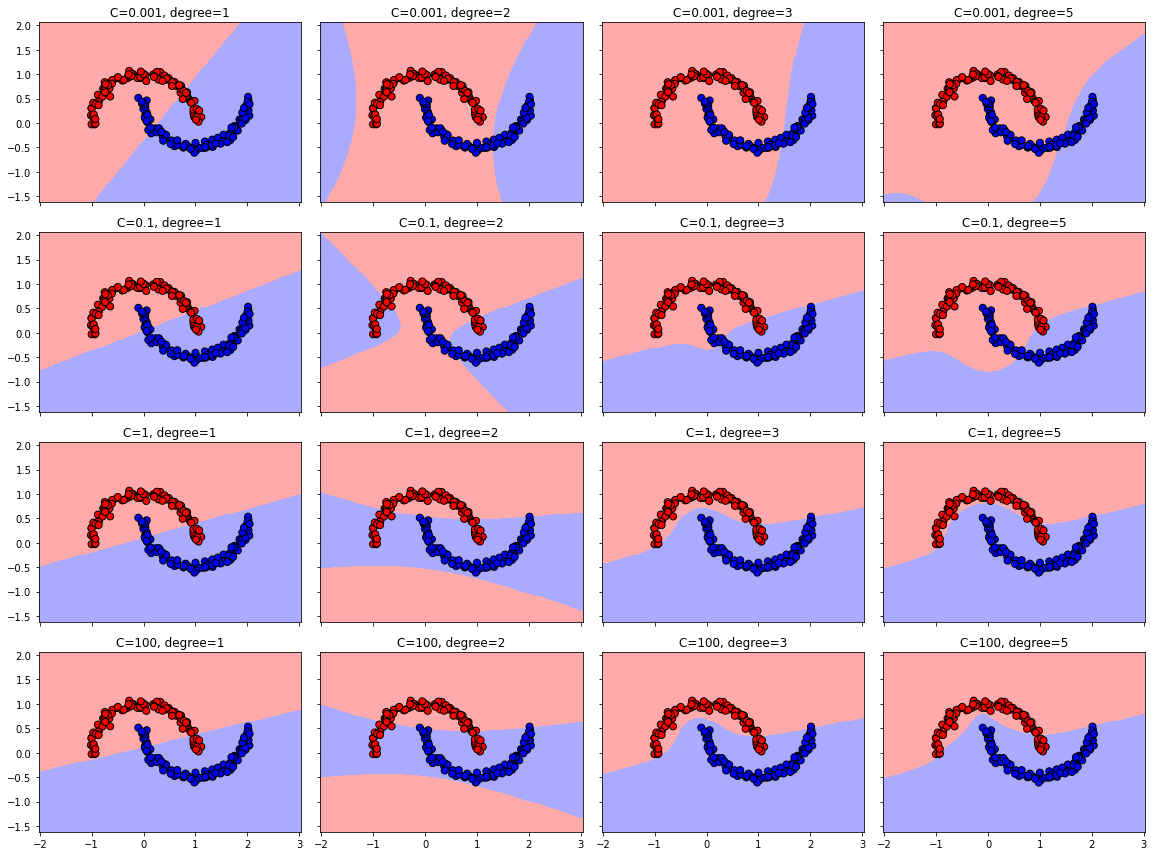

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# hyperparameters to explore
C_values = [0.001, 0.1, 1, 100]
degrees = [1, 2, 3, 5]

#TASK: INSERT CODE HERE
#...

### 3. Multi-class classification with SVMs

In binary SVMs, the classifier computes a decision function:

$$f(x)=\mathbf{w}^T\mathbf{x} + b$$

While the sign of $f(\mathbf{x})$ determines the predicted class (which you have seen till now in this lab-book), the magnitude $|f(\mathbf{x})|$ represents the distance from the separating hyperplane (**but this is not a probability**).

scikit-learn converts distances to probabilities using Platt scaling, which fits a logistic function:

$$P(y=1|f) = 1/(1+\exp(Af + B))$$ 

Does this look familiar? 

In [16]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# -------------------------------------------------------
# 1. Generate a 3-class synthetic dataset (moons)
# -------------------------------------------------------
def make_3class_moons(n_samples=300, noise=0.20):
    X1, _ = make_moons(n_samples=n_samples, noise=noise)
    X2, _ = make_moons(n_samples=n_samples, noise=noise)
    X3, _ = make_moons(n_samples=n_samples, noise=noise)

    # Shift the sets apart
    X2[:, 0] += 4
    X3[:, 1] += 4

    X = np.vstack([X1, X2, X3])
    y = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)
    return X, y

X, y = make_3class_moons()

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

We now write code to train a one vs. rest (OvR) model.

In [17]:
K = 3  # number of classes
ovr_clfs = []

for k in range(K):
    print(f"Training classifier for class {k} vs rest...")
    
    # Binary labels: +1 for class k, 0 for others
    y_binary = (y == k).astype(int)

    clf = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True)
    clf.fit(X, y_binary)

    ovr_clfs.append(clf)

print("Done training OvR models.")


Training classifier for class 0 vs rest...
Training classifier for class 1 vs rest...
Training classifier for class 2 vs rest...
Done training OvR models.


#### Selecting the most likely class

We now need to convert the distances to probabilities for making the selection.

In [18]:
#TASK: INSERT CODE HERE to define the necessary functions
#...
y_pred = ovr_predict(X)

print("Training accuracy:", np.mean(y_pred == y))

Training accuracy: 1.0


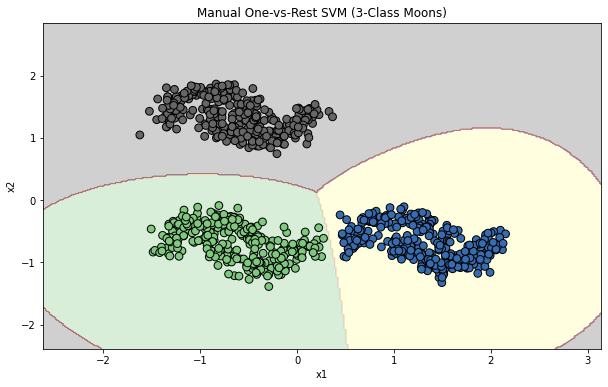

In [20]:
# -------------------------------------------------------
# 4. Plot decision boundaries
# -------------------------------------------------------
h = 0.02
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = ovr_predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Accent")

# Plot training points
plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap="Accent", edgecolor="k")
plt.title("Manual One-vs-Rest SVM (3-Class Moons)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()